In [207]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVC
# from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from itertools import combinations
import pmdarima
from pmdarima.arima.utils import ndiffs
from sklearn.decomposition import PCA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")


In [208]:
#Import Libraries

import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn import linear_model
from sklearn.metrics import accuracy_score,log_loss,precision_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [209]:
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv  # those functions can be used directly
import numpy as np  # a package useful for numerical computations
import scipy.stats as st
# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt   # all functions func in the package can be used as plt.func
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import os  # some terminal commands
import matplotlib #only needed to determine Matplotlib version number
import sklearn # sklearn is a popular statistical learning package; we use it to do linear regression
from sklearn import datasets 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas_datareader import data as wb
# Enable inline plotting
%matplotlib inline

In [210]:
# set display options
pd.options.display.max_rows, pd.options.display.max_columns = 10, 25
factor = pd.read_csv('5_factors.csv')
factor.index = factor['Time'].values
del factor['Time']
factor.dropna(inplace = True)
# factor = factor[-409:]
# factor = factor.loc[198701:,:]
factor = factor.loc[200501:,:]
factor

,Mkt-RF,SMB,HML,RMW,CMA,RF
200501,-2.76,-1.20,2.09,2.73,-1.38,0.16
200502,1.89,-0.29,1.60,1.47,-0.04,0.16
200503,-1.97,-1.36,2.14,0.56,1.12,0.21
200504,-2.61,-4.02,0.02,0.82,-0.90,0.21
200505,3.65,2.71,-0.61,-1.09,0.28,0.24
...,...,...,...,...,...,...
202006,2.46,1.94,-2.22,0.04,0.34,0.01
202007,5.77,-3.03,-1.31,0.55,1.06,0.01
202008,7.63,-0.94,-2.95,4.27,-1.44,0.01
202009,-3.63,0.07,-2.56,-1.15,-1.77,0.01


In [1085]:
table = pd.DataFrame()

# Train Data
# hk_HSI = wb.get_data_yahoo('^HSI',start='1987-2-1', end='2020-11-1', interval='m')

hk_0001 = wb.get_data_yahoo('0045.Hk',start='2005-2-1', end='2020-11-1', interval='m')
hk_0002 = wb.get_data_yahoo('0326.HK',start='2005-2-1', end='2020-11-1', interval='m')
hk_0003 = wb.get_data_yahoo('0008.HK',start='2005-2-1', end='2020-11-1', interval='m')
hk_0004 = wb.get_data_yahoo('0133.Hk',start='2005-2-1', end='2020-11-1', interval='m')
hk_0005 = wb.get_data_yahoo('0137.HK',start='2005-2-1', end='2020-11-1', interval='m')
hk_0006 = wb.get_data_yahoo('0045.HK',start='2005-2-1', end='2020-11-1', interval='m')
hk_0007 = wb.get_data_yahoo('0083.Hk',start='2005-2-1', end='2020-11-1', interval='m')
hk_0008 = wb.get_data_yahoo('0030.Hk',start='2005-2-1', end='2020-11-1', interval='m')
hk_0009 = wb.get_data_yahoo('0084.HK',start='2005-2-1', end='2020-11-1', interval='m')
hk_0010 = wb.get_data_yahoo('0026.HK',start='2005-2-1', end='2020-11-1', interval='m')
# 0008 0137

# 0026 0030 0045



# 0008 0016 0062 0060 0137

#0110 0138 0141 0158 0159 0160 0197 0199 0200 0251 0253


In [1086]:
print('hk_0001 = ', len(hk_0001))
print('hk_0002 = ', len(hk_0002))
print('hk_0003 = ', len(hk_0003))
print('hk_0004 = ', len(hk_0004))
print('hk_0005 = ', len(hk_0005))
print('hk_0006 = ', len(hk_0006))
print('hk_0007 = ', len(hk_0007))
print('hk_0008 = ', len(hk_0008))
print('hk_0009 = ', len(hk_0009))
print('hk_0010 = ', len(hk_0010))

hk_0001 =  190
hk_0002 =  190
hk_0003 =  190
hk_0004 =  190
hk_0005 =  190
hk_0006 =  190
hk_0007 =  190
hk_0008 =  190
hk_0009 =  190
hk_0010 =  190


In [1087]:
hk_0001['Mkt-RF'] = factor['Mkt-RF'].values
hk_0001['SMB'] = factor['SMB'].values
hk_0001['HML'] = factor['HML'].values
hk_0001['RMW'] = factor['RMW'].values
hk_0001['CMA'] = factor['CMA'].values
hk_0001['RF'] = factor['RF'].values
hk_0001['Return-RF'] = (hk_0001['Close'] - hk_0001['Open']) / hk_0001['Open']


hk_0002['Mkt-RF'] = factor['Mkt-RF'].values
hk_0002['SMB'] = factor['SMB'].values
hk_0002['HML'] = factor['HML'].values
hk_0002['RMW'] = factor['RMW'].values
hk_0002['CMA'] = factor['CMA'].values
hk_0002['RF'] = factor['RF'].values
hk_0002['Return-RF'] = (hk_0002['Close'] - hk_0002['Open']) / hk_0002['Open']

hk_0003['Mkt-RF'] = factor['Mkt-RF'].values
hk_0003['SMB'] = factor['SMB'].values
hk_0003['HML'] = factor['HML'].values
hk_0003['RMW'] = factor['RMW'].values
hk_0003['CMA'] = factor['CMA'].values
hk_0003['RF'] = factor['RF'].values
hk_0003['Return-RF'] = (hk_0003['Close'] - hk_0003['Open']) / hk_0003['Open']

hk_0004['Mkt-RF'] = factor['Mkt-RF'].values
hk_0004['SMB'] = factor['SMB'].values
hk_0004['HML'] = factor['HML'].values
hk_0004['RMW'] = factor['RMW'].values
hk_0004['CMA'] = factor['CMA'].values
hk_0004['RF'] = factor['RF'].values
hk_0004['Return-RF'] = (hk_0004['Close'] - hk_0004['Open']) / hk_0004['Open']

hk_0005['Mkt-RF'] = factor['Mkt-RF'].values
hk_0005['SMB'] = factor['SMB'].values
hk_0005['HML'] = factor['HML'].values
hk_0005['RMW'] = factor['RMW'].values
hk_0005['CMA'] = factor['CMA'].values
hk_0005['RF'] = factor['RF'].values
hk_0005['Return-RF'] = (hk_0005['Close'] - hk_0005['Open']) / hk_0005['Open']

hk_0006['Mkt-RF'] = factor['Mkt-RF'].values
hk_0006['SMB'] = factor['SMB'].values
hk_0006['HML'] = factor['HML'].values
hk_0006['RMW'] = factor['RMW'].values
hk_0006['CMA'] = factor['CMA'].values
hk_0006['RF'] = factor['RF'].values
hk_0006['Return-RF'] = (hk_0006['Close'] - hk_0006['Open']) / hk_0006['Open']

hk_0007['Mkt-RF'] = factor['Mkt-RF'].values
hk_0007['SMB'] = factor['SMB'].values
hk_0007['HML'] = factor['HML'].values
hk_0007['RMW'] = factor['RMW'].values
hk_0007['CMA'] = factor['CMA'].values
hk_0007['RF'] = factor['RF'].values
hk_0007['Return-RF'] = (hk_0007['Close'] - hk_0007['Open']) / hk_0007['Open']

hk_0008['Mkt-RF'] = factor['Mkt-RF'].values
hk_0008['SMB'] = factor['SMB'].values
hk_0008['HML'] = factor['HML'].values
hk_0008['RMW'] = factor['RMW'].values
hk_0008['CMA'] = factor['CMA'].values
hk_0008['RF'] = factor['RF'].values
hk_0008['Return-RF'] = (hk_0008['Close'] - hk_0008['Open']) / hk_0008['Open']

hk_0009['Mkt-RF'] = factor['Mkt-RF'].values
hk_0009['SMB'] = factor['SMB'].values
hk_0009['HML'] = factor['HML'].values
hk_0009['RMW'] = factor['RMW'].values
hk_0009['CMA'] = factor['CMA'].values
hk_0009['RF'] = factor['RF'].values
hk_0009['Return-RF'] = (hk_0009['Close'] - hk_0009['Open']) / hk_0009['Open']

hk_0010['Mkt-RF'] = factor['Mkt-RF'].values
hk_0010['SMB'] = factor['SMB'].values
hk_0010['HML'] = factor['HML'].values
hk_0010['RMW'] = factor['RMW'].values
hk_0010['CMA'] = factor['CMA'].values
hk_0010['RF'] = factor['RF'].values
hk_0010['Return-RF'] = (hk_0010['Close'] - hk_0010['Open']) / hk_0010['Open']





# Technical Indicators

# Oscillators and Trend Following Indicators

### 1. MACD

In [1088]:
def MACD(stock_open, stock_high, stock_low, stock_close, stock_volume):
    macd, macdsignal, macdhist = talib.MACD(stock_close, fastperiod=26, slowperiod=12, signalperiod=9)
    MACD = pd.DataFrame(data={'MACD': macd})
    MACD.dropna(inplace=True)
    return MACD


### 2. MACD HISTOGRAM

In [1089]:
def MACDH(stock_open, stock_high, stock_low, stock_close, stock_volume):
    macd, macdsignal, macdhist = talib.MACD(stock_close, fastperiod=26, slowperiod=12, signalperiod=9)
    
    
    MACDH = pd.DataFrame(data={'MHIST': macdhist, 'PrevMHIST': macdhist.shift(1)})
    MACDH.dropna(inplace=True)
    MACDH['MACDH'] = MACDH['MHIST'] - MACDH['PrevMHIST']
    del MACDH['MHIST']
    del MACDH['PrevMHIST']
    return MACDH

### 3. Average Directional Index (ADX)

In [1090]:
def ADX(stock_open, stock_high, stock_low, stock_close, stock_volume):
    adx = talib.ADX(stock_high, stock_low, stock_close, timeperiod=14)
    ADX = pd.DataFrame(data={'ADX': adx})
    ADX.dropna(inplace=True)
    return ADX


### 4. Relative Strength Index (RSI)

In [1091]:
def RSI(stock_open, stock_high, stock_low, stock_close, stock_volume):
    rsi = talib.RSI(stock_close, timeperiod=14)
    RSI = pd.DataFrame(data={'RSI': rsi})
    RSI.dropna(inplace=True)
    return RSI

# Volatility Indicators

### 5. Bollinger Bands

In [1092]:
def BB(stock_open, stock_high, stock_low, stock_close, stock_volume):
    upper, middle, lower = talib.BBANDS(stock_close, timeperiod=26)
    bb = (stock_close - middle)/(upper - lower)
    BB = pd.DataFrame(data={'BB': bb})
    BB.dropna(inplace=True)
    return BB



### 6. ATR

In [1093]:
def ATR(stock_open, stock_high, stock_low, stock_close, stock_volume):
    atr = talib.ATR(stock_high, stock_low, stock_close, timeperiod=20)
    ATR = pd.DataFrame(data={'ATR': atr})
    ATR.dropna(inplace=True)
    return ATR

# Volume Indicators

### 7.  Exponential Moving Average of Force Index

In [1094]:
def EFI(stock_open, stock_high, stock_low, stock_close, stock_volume):
    dict = {'Volume': stock_volume, 'Close': stock_close}
    df = pd.DataFrame(data=dict)
    df.dropna(inplace=True)
    
    fi = df['Volume']*(df['Close'] - df['Close'].shift(1))
    efi = talib.EMA(fi, timeperiod=13)

    EFI = pd.DataFrame(data={'EFi': efi})
    EFI.dropna(inplace=True)
    return EFI


# 8. Volume

In [1095]:
def Volume(stock_open, stock_high, stock_low, stock_close, stock_volume):
    Volome = pd.DataFrame(data={'RSI': stock_volume})
    Volome.dropna(inplace=True)
    return Volome

In [1096]:
hk_0001['Return'] = ((hk_0001['Close'] - hk_0001['Open']) / hk_0001['Open'])
hk_0001['MACD'] = MACD(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001['MACDH'] = MACDH(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001['ADX'] = ADX(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001['RSI'] = RSI(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001['BB'] = BB(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001['ATR'] = ATR(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001['EFI'] = EFI(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001['Volume'] = Volume(hk_0001['Open'], hk_0001['High'], hk_0001['Low'], hk_0001['Close'], hk_0001['Volume'])
hk_0001.dropna(inplace=True)


hk_0002['Return'] = ((hk_0002['Close'] - hk_0002['Open']) / hk_0002['Open'])
hk_0002['MACD'] = MACD(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002['MACDH'] = MACDH(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002['ADX'] = ADX(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002['RSI'] = RSI(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002['BB'] = BB(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002['ATR'] = ATR(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002['EFI'] = EFI(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002['Volume'] = Volume(hk_0002['Open'], hk_0002['High'], hk_0002['Low'], hk_0002['Close'], hk_0002['Volume'])
hk_0002.dropna(inplace=True)


hk_0003['Return'] = ((hk_0003['Close'] - hk_0003['Open']) / hk_0003['Open'])
hk_0003['MACD'] = MACD(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003['MACDH'] = MACDH(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003['ADX'] = ADX(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003['RSI'] = RSI(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003['BB'] = BB(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003['ATR'] = ATR(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003['EFI'] = EFI(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003['Volume'] = Volume(hk_0003['Open'], hk_0003['High'], hk_0003['Low'], hk_0003['Close'], hk_0003['Volume'])
hk_0003.dropna(inplace=True)


hk_0004['Return'] = ((hk_0004['Close'] - hk_0004['Open']) / hk_0004['Open'])
hk_0004['MACD'] = MACD(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004['MACDH'] = MACDH(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004['ADX'] = ADX(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004['RSI'] = RSI(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004['BB'] = BB(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004['ATR'] = ATR(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004['EFI'] = EFI(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004['Volume'] = Volume(hk_0004['Open'], hk_0004['High'], hk_0004['Low'], hk_0004['Close'], hk_0004['Volume'])
hk_0004.dropna(inplace=True)


hk_0005['Return'] = ((hk_0005['Close'] - hk_0005['Open']) / hk_0005['Open'])
hk_0005['MACD'] = MACD(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005['MACDH'] = MACDH(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005['ADX'] = ADX(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005['RSI'] = RSI(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005['BB'] = BB(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005['ATR'] = ATR(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005['EFI'] = EFI(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005['Volume'] = Volume(hk_0005['Open'], hk_0005['High'], hk_0005['Low'], hk_0005['Close'], hk_0005['Volume'])
hk_0005.dropna(inplace=True)


hk_0006['Return'] = ((hk_0006['Close'] - hk_0006['Open']) / hk_0006['Open'])
hk_0006['MACD'] = MACD(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006['MACDH'] = MACDH(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006['ADX'] = ADX(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006['RSI'] = RSI(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006['BB'] = BB(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006['ATR'] = ATR(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006['EFI'] = EFI(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006['Volume'] = Volume(hk_0006['Open'], hk_0006['High'], hk_0006['Low'], hk_0006['Close'], hk_0006['Volume'])
hk_0006.dropna(inplace=True)

hk_0007['Return'] = ((hk_0007['Close'] - hk_0007['Open']) / hk_0007['Open'])
hk_0007['MACD'] = MACD(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007['MACDH'] = MACDH(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007['ADX'] = ADX(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007['RSI'] = RSI(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007['BB'] = BB(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007['ATR'] = ATR(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007['EFI'] = EFI(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007['Volume'] = Volume(hk_0007['Open'], hk_0007['High'], hk_0007['Low'], hk_0007['Close'], hk_0007['Volume'])
hk_0007.dropna(inplace=True)

hk_0008['Return'] = ((hk_0008['Close'] - hk_0008['Open']) / hk_0008['Open'])
hk_0008['MACD'] = MACD(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008['MACDH'] = MACDH(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008['ADX'] = ADX(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008['RSI'] = RSI(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008['BB'] = BB(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008['ATR'] = ATR(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008['EFI'] = EFI(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008['Volume'] = Volume(hk_0008['Open'], hk_0008['High'], hk_0008['Low'], hk_0008['Close'], hk_0008['Volume'])
hk_0008.dropna(inplace=True)


hk_0009['Return'] = ((hk_0009['Close'] - hk_0009['Open']) / hk_0009['Open'])
hk_0009['MACD'] = MACD(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009['MACDH'] = MACDH(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009['ADX'] = ADX(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009['RSI'] = RSI(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009['BB'] = BB(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009['ATR'] = ATR(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009['EFI'] = EFI(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009['Volume'] = Volume(hk_0009['Open'], hk_0009['High'], hk_0009['Low'], hk_0009['Close'], hk_0009['Volume'])
hk_0009.dropna(inplace=True)


hk_0010['Return'] = ((hk_0010['Close'] - hk_0010['Open']) / hk_0010['Open'])
hk_0010['MACD'] = MACD(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010['MACDH'] = MACDH(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010['ADX'] = ADX(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010['RSI'] = RSI(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010['BB'] = BB(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010['ATR'] = ATR(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010['EFI'] = EFI(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010['Volume'] = Volume(hk_0010['Open'], hk_0010['High'], hk_0010['Low'], hk_0010['Close'], hk_0010['Volume'])
hk_0010.dropna(inplace=True)



# Extended-Factors Model (Linearly Regression)

# Principle Component Analysis on Feature

In [1097]:
features = ['Mkt-RF','SMB','HML','RMW','CMA','MACD','MACDH','ADX','RSI','BB','ATR','EFI','Volume']
target = ['Return-RF']

In [1098]:
X_0001 = hk_0001[features]
pca_number = 13
pca_0001 = PCA(n_components=pca_number)
pca_0001.fit(X_0001)

X_0002 = hk_0002[features]
pca_number = 13
pca_0002 = PCA(n_components=pca_number)
pca_0002.fit(X_0002)

X_0003 = hk_0003[features]
pca_number = 13
pca_0003 = PCA(n_components=pca_number)
pca_0003.fit(X_0003)

X_0004 = hk_0004[features]
pca_number = 13
pca_0004 = PCA(n_components=pca_number)
pca_0004.fit(X_0004)

X_0005 = hk_0005[features]
pca_number = 13
pca_0005 = PCA(n_components=pca_number)
pca_0005.fit(X_0005)

X_0006 = hk_0006[features]
pca_number = 13
pca_0006 = PCA(n_components=pca_number)
pca_0006.fit(X_0006)

X_0007 = hk_0007[features]
pca_number = 13
pca_0007 = PCA(n_components=pca_number)
pca_0007.fit(X_0007)

X_0008 = hk_0008[features]
pca_number = 13
pca_0008 = PCA(n_components=pca_number)
pca_0008.fit(X_0008)


X_0009 = hk_0009[features]
pca_number = 13
pca_0009 = PCA(n_components=pca_number)
pca_0009.fit(X_0009)


X_0010 = hk_0010[features]
pca_number = 13
pca_0010 = PCA(n_components=pca_number)
pca_0010.fit(X_0010)

PCA(n_components=13)

In [1099]:
features = ['Mkt-RF','SMB','HML','RMW','CMA','MACD','MACDH','ADX','RSI','BB','ATR','EFI','Volume']
target = ['Return-RF']

X_0001 = hk_0001[features]
X_transform_0001 = pca_0001.transform(X_0001)

X_0002 = hk_0002[features]
X_transform_0002 = pca_0002.transform(X_0002)

X_0003 = hk_0003[features]
X_transform_0003 = pca_0003.transform(X_0003)

X_0004 = hk_0004[features]
X_transform_0004 = pca_0004.transform(X_0004)

X_0005 = hk_0005[features]
X_transform_0005 = pca_0005.transform(X_0005)

X_0006 = hk_0006[features]
X_transform_0006 = pca_0006.transform(X_0006)

X_0007 = hk_0007[features]
X_transform_0007 = pca_0007.transform(X_0007)

X_0008 = hk_0008[features]
X_transform_0008 = pca_0008.transform(X_0008)


X_0009 = hk_0009[features]
X_transform_0009 = pca_0009.transform(X_0009)


X_0010 = hk_0010[features]
X_transform_0010 = pca_0010.transform(X_0010)


In [1100]:
hk_0001.drop(columns = features, inplace=True)
hk_0002.drop(columns = features, inplace=True)
hk_0003.drop(columns = features, inplace=True)
hk_0004.drop(columns = features, inplace=True)
hk_0005.drop(columns = features, inplace=True)
hk_0006.drop(columns = features, inplace=True)
hk_0007.drop(columns = features, inplace=True)
hk_0008.drop(columns = features, inplace=True)
hk_0009.drop(columns = features, inplace=True)
hk_0010.drop(columns = features, inplace=True)


In [1101]:
features_0001 = []
for i in range(X_transform_0001.shape[1]):
    name = 'x' + str(i)
    features_0001.append(name)

features_0002 = []
for i in range(X_transform_0002.shape[1]):
    name = 'x' + str(i)
    features_0002.append(name)

features_0003 = []
for i in range(X_transform_0003.shape[1]):
    name = 'x' + str(i)
    features_0003.append(name)
    
features_0004 = []
for i in range(X_transform_0004.shape[1]):
    name = 'x' + str(i)
    features_0004.append(name)

features_0005 = []
for i in range(X_transform_0005.shape[1]):
    name = 'x' + str(i)
    features_0005.append(name)

features_0006 = []
for i in range(X_transform_0006.shape[1]):
    name = 'x' + str(i)
    features_0006.append(name)
    
features_0007 = []
for i in range(X_transform_0007.shape[1]):
    name = 'x' + str(i)
    features_0007.append(name)

    
features_0008 = []
for i in range(X_transform_0008.shape[1]):
    name = 'x' + str(i)
    features_0008.append(name)


features_0009 = []
for i in range(X_transform_0009.shape[1]):
    name = 'x' + str(i)
    features_0009.append(name)


features_0010 = []
for i in range(X_transform_0010.shape[1]):
    name = 'x' + str(i)
    features_0010.append(name)
   

In [1102]:
for idx, i in enumerate(features_0001):
    hk_0001[i] = X_transform_0001[:,idx]

for idx, i in enumerate(features_0002):
    hk_0002[i] = X_transform_0002[:,idx]
    
for idx, i in enumerate(features_0003):
    hk_0003[i] = X_transform_0003[:,idx]
    
for idx, i in enumerate(features_0004):
    hk_0004[i] = X_transform_0004[:,idx]

for idx, i in enumerate(features_0005):
    hk_0005[i] = X_transform_0005[:,idx]
    
for idx, i in enumerate(features_0006):
    hk_0006[i] = X_transform_0006[:,idx]    

for idx, i in enumerate(features_0007):
    hk_0007[i] = X_transform_0007[:,idx]  
    
for idx, i in enumerate(features_0008):
    hk_0008[i] = X_transform_0008[:,idx]

for idx, i in enumerate(features_0009):
    hk_0009[i] = X_transform_0009[:,idx]
    
for idx, i in enumerate(features_0010):
    hk_0010[i] = X_transform_0010[:,idx]
    

In [1103]:
# pd.options.display.max_rows, pd.options.display.max_columns =len(features), 25

# # VIF dataframe 
# vif_data = pd.DataFrame() 
# vif_data["feature"] = hk_0008[features].columns
  
# # calculating VIF for each feature 
# vif_data["VIF"] = [variance_inflation_factor(hk_0008[features].values, i) 
#                           for i in range(len(hk_0008[features].columns))] 
  
# vif_data

# Time Series Modeling, ARIMA (p,d,q) parameter analysis and estimation

In [1104]:
# X = hk[features]
# # X = pca.transform(X)
# X

In [1105]:
# fig, axs = plt.subplots(len(features), figsize=(15,30))
# for idx, i in enumerate(features):
#     axs[idx].plot(X[i])
#     axs[idx].set_title(i)
#     figsize=(15,10)

# fig.tight_layout()
# plt.show()

In [1106]:
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.graphics.tsaplots import plot_pacf
# from matplotlib import pyplot

# fig, axes = plt.subplots(len(features), 2, figsize=(15,30))

# for idx, i in enumerate(features):
#     plot_acf(X[i], lags=50, title = i + ' Autocorrelation', ax=axes[idx, 0])
#     plot_pacf(X[i], lags=50, title = i +' Partial Autocorrelation', ax=axes[idx, 1])
    
# fig.tight_layout()
# pyplot.show()

## Workflow Demostration on feature-x2
ARIMA(p,d,q) parameter analysis and estimation

In [1107]:
# # Analysis on the d-term of ARIMA(p,d,q)
# fig, axes = plt.subplots(3, 3, figsize=(30,20))
# axes[0, 0].plot(X['x2']); axes[0, 0].set_title('(x2) Original Series')
# plot_acf(X['x2'], lags=50, ax=axes[0, 1])
# plot_pacf(X['x2'], lags=50, ax=axes[0, 2])

# # 1st Differencing
# axes[1, 0].plot(X['x2'].diff()); axes[1, 0].set_title('(x2) 1st Order Differencing')
# plot_acf(X['x2'].diff().dropna(), lags=50, ax=axes[1, 1])
# plot_pacf(X['x2'].diff().dropna(), lags=50, ax=axes[1, 2])

# # 2nd Differencing
# axes[2, 0].plot(X['x2'].diff().diff()); axes[2, 0].set_title('(x2) 2nd Order Differencing')
# plot_acf(X['x2'].diff().diff().dropna(), lags=50, ax=axes[2, 1])
# plot_pacf(X['x2'].diff().diff().dropna(), lags=50, ax=axes[2, 2])

# plt.show()

In [1108]:
# # estimate the d-term of ARIMA(p,d,q)
# import pmdarima
# from pmdarima.arima.utils import ndiffs


# ## Adf Test
# print('ADF: ', ndiffs(X['x2'], test='adf'))

# # KPSS test
# print('KPSS: ', ndiffs(X['x2'], test='kpss') )

# # PP test:
# print('PP: ',ndiffs(X['x2'], test='pp'))

In [1109]:
# # estimate the p,d,q-term of ARIMA(p,d,q)
# arima_order = pmdarima.arima.auto_arima(X['x2'])
# arima_order

In [1110]:
# model = pmdarima.arima.AutoARIMA()
# model_fit = model.fit(X['x2'])
# model_predict = model_fit.predict_in_sample(X['x2'])
# model_fit.summary()

In [1111]:
# # Plot residual errors of the ARIMA model
# residuals = pd.DataFrame(model_predict - X['x2'])
# fig, ax = plt.subplots(2, 1, figsize=(15,20))
# ax[0].set_title('residuals')
# ax[0].plot(residuals)
# ax[1].set_title('Density distribution of residuals')
# sns.distplot(residuals, ax=ax[1])

The residual errors seem fine with near zero mean and normal distributed. Let’s plot the actuals against the fitted values using plot_predict().

In [1112]:
# # Actual vs Fitted
# plt.figure(figsize=(20,10))
# plt.plot(X['x2'].index, X['x2'], label='x2')
# plt.plot(X['x2'].index, model_predict, label='ARIMA')
# plt.legend(loc='upper left', fontsize=12)

The code below use a different library - statsmodels

In [1113]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(X['x6'], order=(1,0,1))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())


In [1114]:
# # Plot residual errors of the ARIMA model
# residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(2, 1, figsize=(15,20))
# ax[0].set_title('residuals')
# ax[0].plot(residuals)
# ax[1].set_title('Density distribution of residuals')
# sns.distplot(residuals, ax=ax[1])

In [1115]:
# # Actual vs Fitted
# plt.figure(figsize=(20,10))
# plt.plot(X['x6'], label='x6')
# plt.plot(model_fit.predict(), label='ARIMA')
# plt.legend(loc='upper left', fontsize=12)

# ARIMA modeling on all features

In [1116]:
X_0001 = hk_0008[features_0001]
X_0002 = hk_0009[features_0002]
X_0003 = hk_0003[features_0003]
X_0004 = hk_0004[features_0004]
X_0005 = hk_0005[features_0005]
X_0006 = hk_0006[features_0006]
X_0007 = hk_0007[features_0007]
X_0008 = hk_0008[features_0008]
X_0009 = hk_0009[features_0009]
X_0010 = hk_0010[features_0010]



In [1117]:
for i in features_0001:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0001[i])
    model_predict = model_fit.predict_in_sample(X_0001[i])
    X_0001[i] = model_predict

for i in features_0002:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0002[i])
    model_predict = model_fit.predict_in_sample(X_0002[i])
    X_0002[i] = model_predict
    
for i in features_0003:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0003[i])
    model_predict = model_fit.predict_in_sample(X_0003[i])
    X_0003[i] = model_predict
    
for i in features_0004:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0004[i])
    model_predict = model_fit.predict_in_sample(X_0004[i])
    X_0004[i] = model_predict

for i in features_0005:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0005[i])
    model_predict = model_fit.predict_in_sample(X_0005[i])
    X_0005[i] = model_predict
    
for i in features_0006:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0006[i])
    model_predict = model_fit.predict_in_sample(X_0006[i])
    X_0006[i] = model_predict
    
for i in features_0007:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0007[i])
    model_predict = model_fit.predict_in_sample(X_0007[i])
    X_0007[i] = model_predict

for i in features_0008:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0008[i])
    model_predict = model_fit.predict_in_sample(X_0008[i])
    X_0008[i] = model_predict
    
for i in features_0009:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0009[i])
    model_predict = model_fit.predict_in_sample(X_0009[i])
    X_0009[i] = model_predict
    
for i in features_0010:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X_0010[i])
    model_predict = model_fit.predict_in_sample(X_0010[i])
    X_0010[i] = model_predict

In [1118]:
new_features_0001 = []
for i in features_0001:
    if np.all(X_0001[i] == 0):
        pass
    else:
        new_features_0001.append(i)
        
features_0001 = new_features_0001.copy()


new_features_0002 = []
for i in features_0002:
    if np.all(X_0002[i] == 0):
        pass
    else:
        new_features_0002.append(i)
        
features_0002 = new_features_0002.copy()


new_features_0003 = []
for i in features_0003:
    if np.all(X_0003[i] == 0):
        pass
    else:
        new_features_0003.append(i)
        
features_0003 = new_features_0003.copy()


new_features_0004 = []
for i in features_0004:
    if np.all(X_0004[i] == 0):
        pass
    else:
        new_features_0004.append(i)
        
features_0004 = new_features_0004.copy()


new_features_0005 = []
for i in features_0005:
    if np.all(X_0005[i] == 0):
        pass
    else:
        new_features_0005.append(i)
        
features_0005 = new_features_0005.copy()


new_features_0006 = []
for i in features_0006:
    if np.all(X_0006[i] == 0):
        pass
    else:
        new_features_0006.append(i)
        
features_0006 = new_features_0006.copy()


new_features_0007 = []
for i in features_0007:
    if np.all(X_0007[i] == 0):
        pass
    else:
        new_features_0007.append(i)
        
features_0007 = new_features_0007.copy()


new_features_0008 = []
for i in features_0008:
    if np.all(X_0008[i] == 0):
        pass
    else:
        new_features_0008.append(i)
        
features_0008 = new_features_0008.copy()


new_features_0009 = []
for i in features_0009:
    if np.all(X_0009[i] == 0):
        pass
    else:
        new_features_0009.append(i)
        
features_0009 = new_features_0009.copy()


new_features_0010 = []
for i in features_0010:
    if np.all(X_0010[i] == 0):
        pass
    else:
        new_features_0010.append(i)
        
features_0010 = new_features_0010.copy()

In [1119]:
for i in features_0001:
    hk_0001[i] = X_0001[i]

for i in features_0002:
    hk_0002[i] = X_0002[i]
    
for i in features_0003:
    hk_0003[i] = X_0003[i]
    
for i in features_0004:
    hk_0004[i] = X_0004[i]

for i in features_0005:
    hk_0005[i] = X_0005[i]
    
for i in features_0006:
    hk_0006[i] = X_0006[i]
    
for i in features_0007:
    hk_0007[i] = X_0007[i]

for i in features_0008:
    hk_0008[i] = X_0008[i]

for i in features_0009:
    hk_0009[i] = X_0008[i]
    
for i in features_0010:
    hk_0010[i] = X_0009[i]
    


In [1120]:
# target = ['Return-RF']

# X = hk_0008[features]
# Y = hk_0008[target]


# model = linear_model.LinearRegression()
# model.fit(X, Y)
# Y_Pred = model.predict(X) 


In [1121]:
# r2_score(Y, Y_Pred)

In [1122]:
# # Specify the matrices
# X = sm.add_constant(hk_0008[features])
# y = hk_0008[target]
# lm4 = sm.OLS(y,X).fit()
# # Show results
# print(lm4.summary())

In [1123]:
# hk_0008

# Investment Analysis with Extended Factor Modeling (long short strategy with market timing)

In [1124]:
'''
1) Greedy Algorithm + PnL Validation
2) Lasso Regression Algorithm + K-Fold Cross-Validation on PnL
3) Ridge Regression Algorithm + K-Fold Cross-Validation on PnL
4) Elastic Net Regression Algorithm + K-Fold Cross-Validation on PnL¶
5) Logistic Regression Algorithm (L2 Regularization) + K-Fold Cross-Validation on PnL
6) Support Vector Machine + K-Fold Cross-Validation on PnL
7) Random Forest + K-Fold Cross-Validation on PnL
'''

'\n1) Greedy Algorithm + PnL Validation\n2) Lasso Regression Algorithm + K-Fold Cross-Validation on PnL\n3) Ridge Regression Algorithm + K-Fold Cross-Validation on PnL\n4) Elastic Net Regression Algorithm + K-Fold Cross-Validation on PnL¶\n5) Logistic Regression Algorithm (L2 Regularization) + K-Fold Cross-Validation on PnL\n6) Support Vector Machine + K-Fold Cross-Validation on PnL\n7) Random Forest + K-Fold Cross-Validation on PnL\n'


# Lasso Regression Algorithm + K-Fold Cross-Validation on PnL

In [1125]:

target = ['Return-RF']

In [1126]:
def r2(df):
    r2 = r2_score(df['Return'], df['Predicted_Return'])
    return r2

In [1127]:
# compute Capital
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Return']>=0:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
    return df

In [1128]:
def r2_Lasso(x_train, y_train, x_valid, y_valid, lamb):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    model = linear_model.Lasso(alpha = lamb)
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                 index = Y_valid.index)
    
    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = r2(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final

In [1129]:
# Build a general function that can perform k-fold Cross Validation on ONE model
# Data: a subset of feature columns plus the target column
# Target: the name of the target column
# n: cut data into n pieces

def kfold_Lasso(data, target, n, lamb, features):
    # We need a vector to record mse from k-fold
    r2 = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation part
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
    
        # Calculate r2
        r2_temp = r2_Lasso(X_train, Y_train, X_valid, Y_valid, lamb)
        r2 = np.append(r2, r2_temp)
        

        
    return r2.mean()

### 10 Year Investment

In [1130]:
fix_history_length = 100  # 2~1 Year
fix_test_length = 55 # 10 Year
sample_size = 1

# the range of t
randomRange = len(hk_0001)-fix_history_length-fix_test_length
randomRange

1

In [1131]:
def backtest_lasso(stock, features):
    
    # an array for saving 50 final best profit
    lambda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
    profit_final = np.array([])
    model_coef = np.zeros((stock.shape[1],sample_size))

    for i in range(sample_size):

        r2_lasso = np.array([])
        np.random.seed(i)
        random_Num =  np.random.randint(randomRange)
        BeginTime = random_Num  
        timestamp = fix_history_length + random_Num
        EndTime = timestamp + fix_test_length

        # use BeginTime and EndTime to filter test and train_valid
        train_valid = stock.iloc[BeginTime:timestamp, : ]
        test = stock.iloc[timestamp:EndTime, : ]

        for lamb in lambda_list:
            r2_lasso = np.append(r2_lasso, kfold_Lasso(train_valid, target, 10, lamb, features))

        lambda_selected_lasso = lambda_list[r2_lasso.argmin()]

        print('lambda_selected',lambda_selected_lasso)

        X_cv = train_valid[features]
        Y_cv = train_valid[target]

        X_test_cv = test[features]
        Y_test_cv = test[target]


        model_cv = linear_model.Lasso(alpha = lambda_selected_lasso)
        model_cv.fit(X_cv, Y_cv)

        Y_test_cv_fit = model_cv.predict(X_test_cv)

        long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                      'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                      'Capital': np.zeros(len(Y_test_cv))},
                                     index = Y_test_cv.index)

        cols = ['Return', 'Predicted_Return', 'Capital']
        long_short_df = long_short_df[cols]

        initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                               columns = long_short_df.columns)
        long_short_df = pd.concat([initial, long_short_df])
        long_short_df_final = computation(long_short_df)


        profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])

#         for j in range(len(model_cv.coef_)):
#             model_coef[j][i] = model_cv.coef_[j]

#     for i in range(len(model_cv.coef_)):
#         print(i,' feature coef = ', model_coef[i].mean())



#     profit_final = (profit_final - 1)*100

#     print('Returns :')
#     for idx, num in enumerate(profit_final):
#         print(round(profit_final[idx]), end='%, ')

#     print('Maximum Return: ', np.around(max(profit_final)))
#     print('Minimum Return: ', np.around(min(profit_final)))
#     print('Average Return: ', np.around(profit_final.mean()))
#     print('Standard Deviation: ', np.around(profit_final.std()))
#     print("320 training days")
#     print("80 validation days")
#     print("100 test days")
    
    return long_short_df_final

In [1132]:
backtest_lasso_0001 = backtest_lasso(hk_0001, features_0001)
backtest_lasso_0002 = backtest_lasso(hk_0002, features_0002)
backtest_lasso_0003 = backtest_lasso(hk_0003, features_0003)
backtest_lasso_0004 = backtest_lasso(hk_0004, features_0004)
backtest_lasso_0005 = backtest_lasso(hk_0005, features_0005)
backtest_lasso_0006 = backtest_lasso(hk_0006, features_0006)
backtest_lasso_0007 = backtest_lasso(hk_0007, features_0007)
backtest_lasso_0008 = backtest_lasso(hk_0008, features_0008)
backtest_lasso_0009 = backtest_lasso(hk_0009, features_0009)
backtest_lasso_0010 = backtest_lasso(hk_0010, features_0010)

lambda_selected 1e-08
lambda_selected 0.0001
lambda_selected 1e-08
lambda_selected 1e-08
lambda_selected 1e-08
lambda_selected 1e-08
lambda_selected 1e-08
lambda_selected 1e-08
lambda_selected 1e-08
lambda_selected 1e-08


In [1133]:
print('r2_0001 =', r2_score(backtest_lasso_0001['Return'], backtest_lasso_0001['Predicted_Return']))
print('r2_0002 =', r2_score(backtest_lasso_0002['Return'], backtest_lasso_0002['Predicted_Return']))
print('r2_0003 =', r2_score(backtest_lasso_0003['Return'], backtest_lasso_0003['Predicted_Return']))
print('r2_0004 =', r2_score(backtest_lasso_0004['Return'], backtest_lasso_0004['Predicted_Return']))
print('r2_0005 =', r2_score(backtest_lasso_0005['Return'], backtest_lasso_0005['Predicted_Return']))
print('r2_0006 =', r2_score(backtest_lasso_0006['Return'], backtest_lasso_0006['Predicted_Return']))
print('r2_0007 =', r2_score(backtest_lasso_0007['Return'], backtest_lasso_0007['Predicted_Return']))
print('r2_0008 =', r2_score(backtest_lasso_0008['Return'], backtest_lasso_0008['Predicted_Return']))
print('r2_0009 =', r2_score(backtest_lasso_0009['Return'], backtest_lasso_0009['Predicted_Return']))
print('r2_0010 =', r2_score(backtest_lasso_0010['Return'], backtest_lasso_0010['Predicted_Return']))



r2_0001 = -0.37113383885625084
r2_0002 = -0.1907707273960597
r2_0003 = 0.07884579742090436
r2_0004 = -0.30517789487695324
r2_0005 = 0.04334156404689771
r2_0006 = -0.39007958417153055
r2_0007 = -1.2148722566402266
r2_0008 = -0.10354654426794241
r2_0009 = -0.33944449331254045
r2_0010 = -0.032794862582986584


In [1134]:
portfolio_lasso = 1/10 * (backtest_lasso_0001['Capital'] + backtest_lasso_0002['Capital'] + backtest_lasso_0003['Capital'] +backtest_lasso_0004['Capital'] + backtest_lasso_0005['Capital'] + backtest_lasso_0006['Capital'] + backtest_lasso_0007['Capital'] + backtest_lasso_0008['Capital'] + backtest_lasso_0009['Capital'] + backtest_lasso_0010['Capital'])


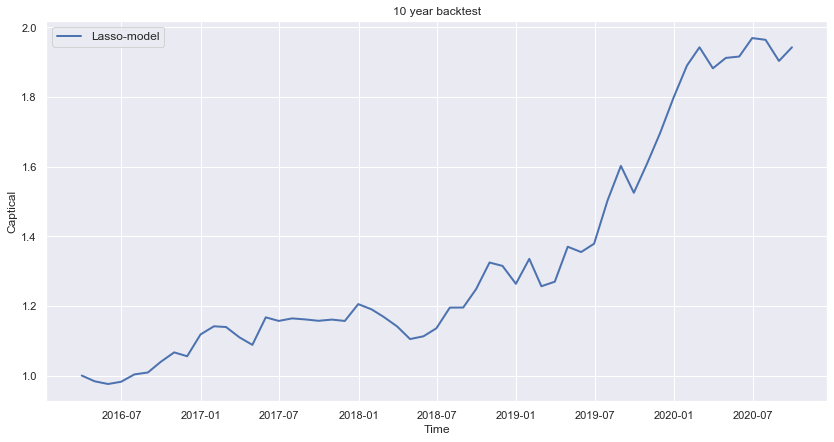

In [1135]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
# plt.plot(hk_0008['Close'][timestamp:EndTime] / hk_0008['Close'][timestamp], label = "Long-only")
plt.plot(portfolio_lasso[1:], lw=2, label='Lasso-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

# Random Forest + K-Fold Cross-Validation on PnL

In [1136]:
target = ['Return-RF']

In [1137]:
def r2(df):
    r2 = r2_score(df['Return'], df['Predicted_Return'])
    return r2

In [1138]:
# compute Capital
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Return']>=0:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
    return df

In [1139]:
def Random_Forest(x_train, y_train, x_valid, y_valid, depth):

    
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                 index = Y_valid.index)
    
    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final

In [1140]:
# Build a general function that can perform k-fold Cross Validation on ONE model
# Data: a subset of feature columns plus the target column
# Target: the name of the target column
# n: cut data into n pieces

def kfold_randomForest(data, target, n, depth, features):
    # We need a vector to record mse from k-fold
    r2 = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation part
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
    
        # Calculate r2
        r2_temp = Random_Forest(X_train, Y_train, X_valid, Y_valid, depth)
        r2 = np.append(r2, r2_temp)
        

        
    return r2.mean()

### 10 Year investment

In [1141]:
fix_history_length = 100  # 2~1 Year
fix_test_length = 55 # 10 Year
sample_size = 1

# the range of t
randomRange = len(hk_0001)-fix_history_length-fix_test_length
randomRange

1

In [1142]:
def backtest_random_forest(stock, features):
    
    # an array for saving 50 final best profit
    depth_list = np.array([2,5,15])
    profit_final = np.array([])
    model_coef = np.zeros((stock.shape[1],sample_size))

    for i in range(sample_size):

        random_forest = np.array([])
        np.random.seed(i)
        random_Num =  np.random.randint(randomRange)
        BeginTime = random_Num  
        timestamp = fix_history_length + random_Num
        EndTime = timestamp + fix_test_length

        # use BeginTime and EndTime to filter test and train_valid
        train_valid = stock.iloc[BeginTime:timestamp, : ]
        test = stock.iloc[timestamp:EndTime, : ]

        for depth in depth_list:
            random_forest = np.append(random_forest, kfold_randomForest(train_valid, target, 10, depth, features))

        depth_selected_randomForest = depth_list[random_forest.argmin()]

        print('depth_selected',depth_selected_randomForest)

        X_cv = train_valid[features]
        Y_cv = train_valid[target]

        X_test_cv = test[features]
        Y_test_cv = test[target]


        model_cv = RandomForestRegressor(max_depth=depth_selected_randomForest)
        model_cv.fit(X_cv, Y_cv)
        Y_test_cv_fit = model_cv.predict(X_test_cv)

        long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                      'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                      'Capital': np.zeros(len(Y_test_cv))},
                                     index = Y_test_cv.index)

        cols = ['Return', 'Predicted_Return', 'Capital']
        long_short_df = long_short_df[cols]

        initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                               columns = long_short_df.columns)
        long_short_df = pd.concat([initial, long_short_df])
        long_short_df_final = computation(long_short_df)


        profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])





#     profit_final = (profit_final - 1)*100

#     print('Returns :')
#     for idx, num in enumerate(profit_final):
#         print(round(profit_final[idx]), end='%, ')

#     print('Maximum Return: ', np.around(max(profit_final)))
#     print('Minimum Return: ', np.around(min(profit_final)))
#     print('Average Return: ', np.around(profit_final.mean()))
#     print('Standard Deviation: ', np.around(profit_final.std()))
#     print("320 training days")
#     print("80 validation days")
#     print("100 test days")
    
    
    return long_short_df_final
    

In [1143]:
backtest_random_forest_0001 = backtest_random_forest(hk_0001, features_0001)
backtest_random_forest_0002 = backtest_random_forest(hk_0002, features_0002)
backtest_random_forest_0003 = backtest_random_forest(hk_0003, features_0003)
backtest_random_forest_0004 = backtest_random_forest(hk_0004, features_0004)
backtest_random_forest_0005 = backtest_random_forest(hk_0005, features_0005)
backtest_random_forest_0006 = backtest_random_forest(hk_0006, features_0006)
backtest_random_forest_0007 = backtest_random_forest(hk_0007, features_0007)
backtest_random_forest_0008 = backtest_random_forest(hk_0008, features_0008)
backtest_random_forest_0009 = backtest_random_forest(hk_0009, features_0009)
backtest_random_forest_0010 = backtest_random_forest(hk_0010, features_0010)

depth_selected 2
depth_selected 2
depth_selected 2
depth_selected 2
depth_selected 5
depth_selected 15
depth_selected 5
depth_selected 2
depth_selected 2
depth_selected 2


In [1144]:
print('r2_0001 =', r2_score(backtest_random_forest_0001['Return'], backtest_random_forest_0001['Predicted_Return']))
print('r2_0002 =', r2_score(backtest_random_forest_0002['Return'], backtest_random_forest_0002['Predicted_Return']))
print('r2_0003 =', r2_score(backtest_random_forest_0003['Return'], backtest_random_forest_0003['Predicted_Return']))
print('r2_0004 =', r2_score(backtest_random_forest_0004['Return'], backtest_random_forest_0004['Predicted_Return']))
print('r2_0005 =', r2_score(backtest_random_forest_0005['Return'], backtest_random_forest_0005['Predicted_Return']))
print('r2_0006 =', r2_score(backtest_random_forest_0006['Return'], backtest_random_forest_0006['Predicted_Return']))
print('r2_0007 =', r2_score(backtest_random_forest_0007['Return'], backtest_random_forest_0007['Predicted_Return']))
print('r2_0008 =', r2_score(backtest_random_forest_0008['Return'], backtest_random_forest_0008['Predicted_Return']))
print('r2_0009 =', r2_score(backtest_random_forest_0009['Return'], backtest_random_forest_0009['Predicted_Return']))
print('r2_0010 =', r2_score(backtest_random_forest_0010['Return'], backtest_random_forest_0010['Predicted_Return']))


r2_0001 = 0.03827050731210557
r2_0002 = -0.0036902383373114134
r2_0003 = 0.01592438120706674
r2_0004 = -0.10103523589398744
r2_0005 = 0.07304913648645461
r2_0006 = 0.048877196476611484
r2_0007 = -0.01654916916521354
r2_0008 = 0.03361683559310935
r2_0009 = 0.026081688953132454
r2_0010 = -0.0044709643330889115


In [1145]:
portfolio_random_forest = 1/10 * (backtest_random_forest_0001['Capital'] + backtest_random_forest_0002['Capital'] + backtest_random_forest_0003['Capital'] + backtest_random_forest_0004['Capital'] + backtest_random_forest_0005['Capital'] + backtest_random_forest_0006['Capital'] + backtest_random_forest_0007['Capital'] +  backtest_random_forest_0008['Capital'] + backtest_random_forest_0009['Capital'] + backtest_random_forest_0010['Capital'])



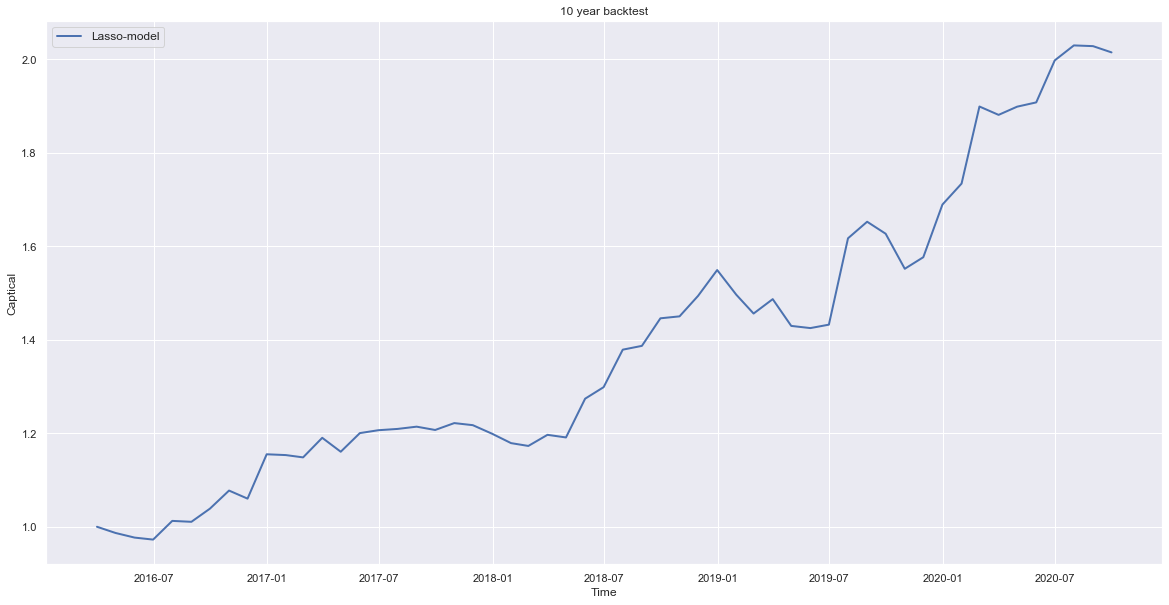

In [1146]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(20, 10))
# plt.plot(hk_0008['Close'][timestamp:EndTime] / hk_0008['Close'][timestamp], label = "Long-only")
plt.plot(portfolio_random_forest[1:], lw=2, label='Lasso-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

# Diebold-Mariano Test

In [1147]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            #if comp.match(s) is None:
            #    return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [1148]:
DMT_mad_1 = dm_test(backtest_random_forest_0001['Return'], backtest_random_forest_0001['Predicted_Return'], backtest_lasso_0001['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_1 = dm_test(backtest_random_forest_0001['Return'], backtest_random_forest_0001['Predicted_Return'], backtest_lasso_0001['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1149]:
DMT_mad_2 = dm_test(backtest_random_forest_0002['Return'], backtest_random_forest_0002['Predicted_Return'], backtest_lasso_0002['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_2 = dm_test(backtest_random_forest_0002['Return'], backtest_random_forest_0002['Predicted_Return'], backtest_lasso_0002['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1150]:
DMT_mad_3 = dm_test(backtest_random_forest_0003['Return'], backtest_random_forest_0003['Predicted_Return'], backtest_lasso_0003['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_3 = dm_test(backtest_random_forest_0003['Return'], backtest_random_forest_0003['Predicted_Return'], backtest_lasso_0003['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1151]:
DMT_mad_4 = dm_test(backtest_random_forest_0004['Return'], backtest_random_forest_0004['Predicted_Return'], backtest_lasso_0004['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_4 = dm_test(backtest_random_forest_0004['Return'], backtest_random_forest_0004['Predicted_Return'], backtest_lasso_0004['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1152]:
DMT_mad_5 = dm_test(backtest_random_forest_0005['Return'], backtest_random_forest_0005['Predicted_Return'], backtest_lasso_0005['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_5 = dm_test(backtest_random_forest_0005['Return'], backtest_random_forest_0005['Predicted_Return'], backtest_lasso_0005['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1153]:
DMT_mad_6 = dm_test(backtest_random_forest_0006['Return'], backtest_random_forest_0006['Predicted_Return'], backtest_lasso_0006['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_6 = dm_test(backtest_random_forest_0006['Return'], backtest_random_forest_0006['Predicted_Return'], backtest_lasso_0006['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1154]:
DMT_mad_7 = dm_test(backtest_random_forest_0007['Return'], backtest_random_forest_0007['Predicted_Return'], backtest_lasso_0007['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_7 = dm_test(backtest_random_forest_0007['Return'], backtest_random_forest_0007['Predicted_Return'], backtest_lasso_0007['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1155]:
DMT_mad_8 = dm_test(backtest_random_forest_0008['Return'], backtest_random_forest_0008['Predicted_Return'], backtest_lasso_0008['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_8 = dm_test(backtest_random_forest_0008['Return'], backtest_random_forest_0008['Predicted_Return'], backtest_lasso_0008['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1156]:
DMT_mad_9 = dm_test(backtest_random_forest_0009['Return'], backtest_random_forest_0009['Predicted_Return'], backtest_lasso_0009['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_9 = dm_test(backtest_random_forest_0009['Return'], backtest_random_forest_0009['Predicted_Return'], backtest_lasso_0009['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1157]:
DMT_mad_10 = dm_test(backtest_random_forest_0010['Return'], backtest_random_forest_0010['Predicted_Return'], backtest_lasso_0010['Predicted_Return'], h = 1, crit="MAD")
print (rt)
DMT_mse_10 = dm_test(backtest_random_forest_0010['Return'], backtest_random_forest_0010['Predicted_Return'], backtest_lasso_0010['Predicted_Return'], h = 1, crit="MSE")
print (rt)

dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)
dm_return(DM=-1.0042197039437264, p_value=0.3196705220558032)


In [1158]:
mad = np.array([])
mse = np.array([])


mad = np.append(mad, DMT_mad_1.p_value)
mad = np.append(mad, DMT_mad_2.p_value)
mad = np.append(mad, DMT_mad_3.p_value)
mad = np.append(mad, DMT_mad_4.p_value)
mad = np.append(mad, DMT_mad_5.p_value)
mad = np.append(mad, DMT_mad_6.p_value)
mad = np.append(mad, DMT_mad_7.p_value)
mad = np.append(mad, DMT_mad_8.p_value)
mad = np.append(mad, DMT_mad_9.p_value)
mad = np.append(mad, DMT_mad_10.p_value)


mse = np.append(mse, DMT_mse_1.p_value)
mse = np.append(mse, DMT_mse_2.p_value)
mse = np.append(mse, DMT_mse_3.p_value)
mse = np.append(mse, DMT_mse_4.p_value)
mse = np.append(mse, DMT_mse_5.p_value)
mse = np.append(mse, DMT_mse_6.p_value)
mse = np.append(mse, DMT_mse_7.p_value)
mse = np.append(mse, DMT_mse_8.p_value)
mse = np.append(mse, DMT_mse_9.p_value)
mse = np.append(mse, DMT_mse_10.p_value)

BMT = pd.DataFrame()
BMT['MAD'] = mad
BMT['MSE'] = mse
BMT.index = range(1,11)
BMT

,MAD,MSE
1,0.100692,0.053227
2,0.024824,0.384876
3,0.552893,0.430633
4,0.681335,0.191614
5,0.841836,0.781831
6,0.014899,0.046096
7,0.011183,0.005075
8,0.230054,0.414130
9,0.005297,0.009230
10,0.635315,0.626205


In [1159]:

long_lasso = backtest_lasso_0001.copy()
short_lasso = backtest_lasso_0001.copy()

long_lasso['Return'] = 1
long_lasso['Capital'] = 1
short_lasso['Return'] = 1
short_lasso['Capital'] = 1


for i in range(1, backtest_lasso_0001.shape[0]):
    if backtest_lasso_0001.loc[backtest_lasso_0001.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0001.loc[backtest_lasso_0001.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0001.loc[backtest_lasso_0001.index[i], 'Return']
        
        
    if backtest_lasso_0002.loc[backtest_lasso_0002.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0002.loc[backtest_lasso_0002.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0002.loc[backtest_lasso_0002.index[i], 'Return']
        
        
    if backtest_lasso_0003.loc[backtest_lasso_0003.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0003.loc[backtest_lasso_0003.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0003.loc[backtest_lasso_0003.index[i], 'Return']
        
        
    if backtest_lasso_0004.loc[backtest_lasso_0004.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0004.loc[backtest_lasso_0004.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0004.loc[backtest_lasso_0004.index[i], 'Return']
        
        
    if backtest_lasso_0005.loc[backtest_lasso_0005.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0005.loc[backtest_lasso_0005.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0005.loc[backtest_lasso_0005.index[i], 'Return']
        
        
    if backtest_lasso_0006.loc[backtest_lasso_0006.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0006.loc[backtest_lasso_0006.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0006.loc[backtest_lasso_0006.index[i], 'Return']
        
        
        
    if backtest_lasso_0007.loc[backtest_lasso_0007.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0007.loc[backtest_lasso_0007.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0007.loc[backtest_lasso_0007.index[i], 'Return']
        
        
        
    if backtest_lasso_0008.loc[backtest_lasso_0008.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0008.loc[backtest_lasso_0008.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0008.loc[backtest_lasso_0008.index[i], 'Return']
        
        
    if backtest_lasso_0009.loc[backtest_lasso_0009.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0009.loc[backtest_lasso_0009.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0009.loc[backtest_lasso_0009.index[i], 'Return']
            
        
    if backtest_lasso_0010.loc[backtest_lasso_0010.index[i], 'Predicted_Return'] >= 0:
        long_lasso.loc[long_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0010.loc[backtest_lasso_0010.index[i], 'Return']
    else:
        short_lasso.loc[short_lasso.index[i], 'Return'] += 1/10 * backtest_lasso_0010.loc[backtest_lasso_0010.index[i], 'Return']
        
    
    
    long_lasso.loc[long_lasso.index[i], 'Capital'] = long_lasso.loc[long_lasso.index[i-1], 'Capital'] * long_lasso.loc[long_lasso.index[i], 'Return']
    short_lasso.loc[short_lasso.index[i], 'Capital'] = short_lasso.loc[short_lasso.index[i-1], 'Capital'] * short_lasso.loc[short_lasso.index[i], 'Return']
    
    
    

In [1160]:

long_rf = backtest_random_forest_0001.copy()
short_rf = backtest_random_forest_0001.copy()

long_rf['Return'] = 1
long_rf['Capital'] = 1
short_rf['Return'] = 1
short_rf['Capital'] = 1


for i in range(1, backtest_random_forest_0001.shape[0]):
    if backtest_random_forest_0001.loc[backtest_random_forest_0001.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0001.loc[backtest_random_forest_0001.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0001.loc[backtest_random_forest_0001.index[i], 'Return']
        
        
    if backtest_random_forest_0002.loc[backtest_random_forest_0002.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0002.loc[backtest_random_forest_0002.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0002.loc[backtest_random_forest_0002.index[i], 'Return']
        
        
    if backtest_random_forest_0003.loc[backtest_random_forest_0003.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0003.loc[backtest_random_forest_0003.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0003.loc[backtest_random_forest_0003.index[i], 'Return']
        
        
    if backtest_random_forest_0004.loc[backtest_random_forest_0004.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0004.loc[backtest_random_forest_0004.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0004.loc[backtest_random_forest_0004.index[i], 'Return']
        
        
    if backtest_random_forest_0005.loc[backtest_random_forest_0005.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0005.loc[backtest_random_forest_0005.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0005.loc[backtest_random_forest_0005.index[i], 'Return']
        
        
    if backtest_random_forest_0006.loc[backtest_random_forest_0006.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0006.loc[backtest_random_forest_0006.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0006.loc[backtest_random_forest_0006.index[i], 'Return']
        
        
        
    if backtest_random_forest_0007.loc[backtest_random_forest_0007.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0007.loc[backtest_random_forest_0007.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0007.loc[backtest_random_forest_0007.index[i], 'Return']
        
        
        
    if backtest_random_forest_0008.loc[backtest_random_forest_0008.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0008.loc[backtest_random_forest_0008.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0008.loc[backtest_random_forest_0008.index[i], 'Return']
        
        
    if backtest_random_forest_0009.loc[backtest_random_forest_0009.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0009.loc[backtest_random_forest_0009.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0009.loc[backtest_random_forest_0009.index[i], 'Return']
            
        
    if backtest_random_forest_0010.loc[backtest_random_forest_0010.index[i], 'Predicted_Return'] >= 0:
        long_rf.loc[long_rf.index[i], 'Return'] += 1/10 * backtest_random_forest_0010.loc[backtest_random_forest_0010.index[i], 'Return']
    else:
        short_rf.loc[short.index[i], 'Return'] += 1/10 * backtest_random_forest_0010.loc[backtest_random_forest_0010.index[i], 'Return']
        
    
    
    long_rf.loc[long_rf.index[i], 'Capital'] = long_rf.loc[long_rf.index[i-1], 'Capital'] * long_rf.loc[long_rf.index[i], 'Return']
    short_rf.loc[short_rf.index[i], 'Capital'] = short_rf.loc[short_rf.index[i-1], 'Capital'] * short_rf.loc[short_rf.index[i], 'Return']
    
    
    

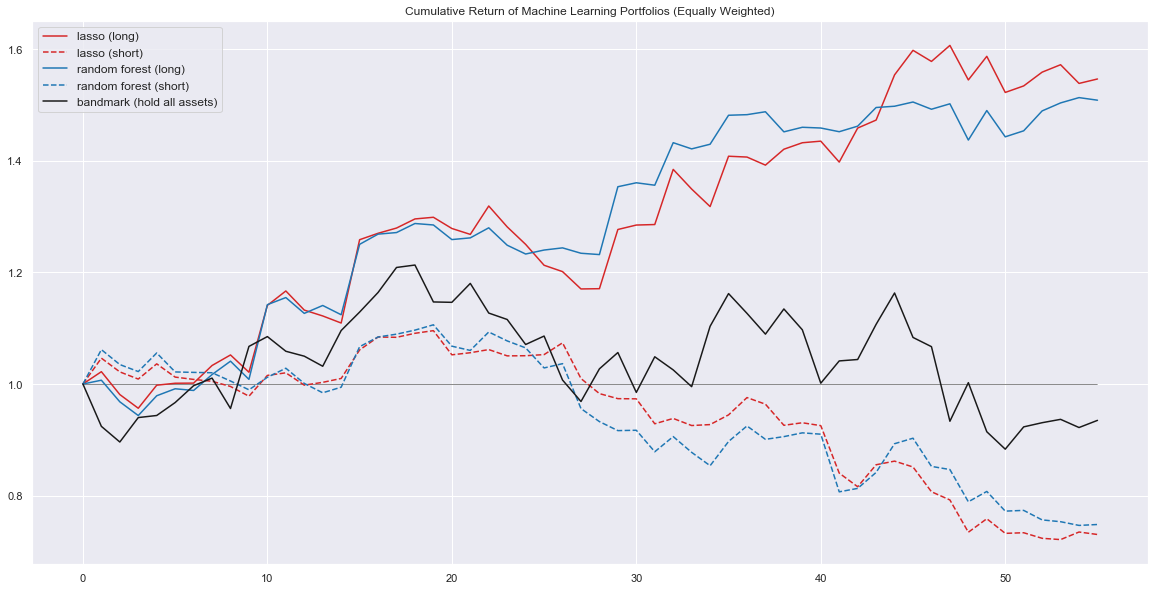

In [1161]:
plt.figure(figsize=(20, 10))
plt.plot(np.ones(56), ls='-', lw=0.5, color = 'k')
plt.plot(long_lasso['Capital'].values, ls='-', color = 'tab:red', label='lasso (long)')
plt.plot(short_lasso['Capital'].values, ls='--', color = 'tab:red', label='lasso (short)')
plt.plot(long_rf['Capital'].values, ls='-', color = 'tab:blue', label='random forest (long)')
plt.plot(short_rf['Capital'].values, ls='--', color = 'tab:blue', label='random forest (short)')

plt.plot(bandmark['Capital'].values, ls='-', color = 'K', label='bandmark (hold all assets)')

plt.title("Cumulative Return of Machine Learning Portfolios (Equally Weighted)")
plt.legend(loc='upper left', fontsize=12)

In [1162]:
r2_rf = np.array([])

r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0001['Return'], backtest_random_forest_0001['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0002['Return'], backtest_random_forest_0002['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0003['Return'], backtest_random_forest_0003['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0004['Return'], backtest_random_forest_0004['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0005['Return'], backtest_random_forest_0005['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0006['Return'], backtest_random_forest_0006['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0007['Return'], backtest_random_forest_0007['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0008['Return'], backtest_random_forest_0008['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0009['Return'], backtest_random_forest_0009['Predicted_Return']))
r2_rf = np.append(r2_rf, r2_score(backtest_random_forest_0010['Return'], backtest_random_forest_0010['Predicted_Return']))



In [1163]:
r2_lasso = np.array([])

r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0001['Return'], backtest_lasso_0001['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0002['Return'], backtest_lasso_0002['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0003['Return'], backtest_lasso_0003['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0004['Return'], backtest_lasso_0004['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0005['Return'], backtest_lasso_0005['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0006['Return'], backtest_lasso_0006['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0007['Return'], backtest_lasso_0007['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0008['Return'], backtest_lasso_0008['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0009['Return'], backtest_lasso_0009['Predicted_Return']))
r2_lasso = np.append(r2_lasso, r2_score(backtest_lasso_0010['Return'], backtest_lasso_0010['Predicted_Return']))



In [1164]:
r2_wide = pd.DataFrame()
r2_wide['lasso'] = r2_lasso
r2_wide['random_forest'] = r2_rf
r2_wide.index = range(1,11)


r2_long = r2_wide.unstack().reset_index() 
# r2_rf_long = r2_rf_wide.unstack().reset_index() 


r2_long.columns = ['stocks','slices','r2']
# r2_rf_long = ['stocks','slices','r2']


In [1165]:
print("Monthly Out-of-sample Stock-level Prediction Performance (R2)")
r2_wide

Monthly Out-of-sample Stock-level Prediction Performance (R2)


,lasso,random_forest
1,-0.371134,0.038271
2,-0.190771,-0.003690
3,0.078846,0.015924
4,-0.305178,-0.101035
5,0.043342,0.073049
6,-0.390080,0.048877
7,-1.214872,-0.016549
8,-0.103547,0.033617
9,-0.339444,0.026082
10,-0.032795,-0.004471


[Text(0, 0.5, 'weight'), Text(0.5, 0, 'rolling')]

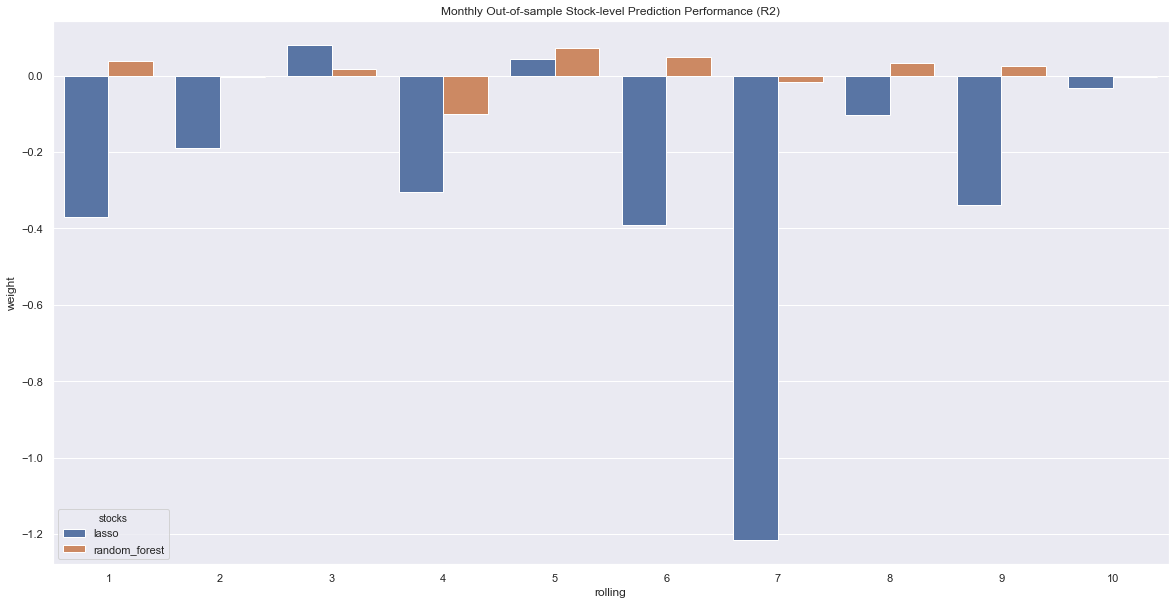

In [1166]:
# plot to compare the allocations
sns.set(rc={'figure.figsize':(20,10)})

ax = sns.barplot(data=r2_long, x='slices', y='r2', hue='stocks')
ax.set_title("Monthly Out-of-sample Stock-level Prediction Performance (R2)")
ax.set(xlabel='rolling', ylabel='weight')